In [1]:
# init
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

# word claud lib
from wordcloud import WordCloud

In [7]:
# load data
times_data = pd.read_csv('input/timesData.csv')

In [58]:
print(times_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

## line chart
line chart example: citation and teaching vs world rank of top 100 universities
* import graph_objs as *go*
* creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like *marker, line or line + marker*
    * name = name of the plot
    * marker = marker is used with dictionaries
        * color = color of lines. it takes RGB and opacity
    * text = the hover text (hover is curser)
* data = is a list that we ad traces into it
* layout = {}
    * title = {}
    * x axis = {}
        * title = labels of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
* fig = it includes data and fig
* iplot() = plots the figure(fig) that is created by data and layout

In [59]:

import plotly.graph_objs as go

df = times_data.loc[:100, :]

trace1 = go.Scatter(
    x=df.world_rank,
    y=df.citations,
    mode='lines',
    name='citations',
    marker=dict(color='rgba(16, 112, 2, 0.8)'),
    text=df.university_name
)
trace2 = go.Scatter(
    x=df.world_rank,
    y=df.teaching,
    mode='lines+markers',
    name='teaching',
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
    text=df.university_name
  )
data = [trace1, trace2]
layout = dict(
    title='Citation and teaching vs World rank of top 10 universities',
    xaxis=dict(
        title='World Rank',
        ticks='outside',
        ticklen=5,
        zeroline=True, # not working
        zerolinewidth=12
    ),
    yaxis=dict(
        ticks='outside',
        ticklen=5,
        zeroline=True, # not working
        zerolinewidth=12
    )
)
fig = dict(
    data=data,
    layout=layout
)
# print(fig)

iplot(fig)

## scatter chart
line chart example: citation vs world rank of top 100 universities with 2014, 2015, 2016 years
* import graph_objs as *go*
* creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like *marker, line or line + marker*
    * name = name of the plot
    * marker = marker is used with dictionaries
        * color = color of lines. it takes RGB and opacity
    * text = the hover text (hover is curser)
* data = is a list that we ad traces into it
* layout = {}
    * title = {}
    * x axis = {}
        * title = labels of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
* fig = it includes data and fig
* iplot() = plots the figure(fig) that is created by data and layout

In [39]:
df2014 = times_data[times_data.year == 2014].iloc[:100, :]
df2015 = times_data[times_data.year == 2015].iloc[:100, :]
df2016 = times_data[times_data.year == 2016].iloc[:100, :]


trace1 = go.Scatter(
    x=df2014.world_rank,
    y=df2014.citations,
    mode='markers',
    name='2014',
    marker=dict(color='rgba(255, 128, 255, 0.8)'),
    text=df2014.university_name
)
trace2 = go.Scatter(
    x=df2015.world_rank,
    y=df2015.citations,
    mode='markers',
    name='2015',
    marker=dict(color='rgba(255, 128, 2, 0.8)'),
    text=df2015.university_name
)
trace3 = go.Scatter(
    x=df2016.world_rank,
    y=df2016.citations,
    mode='markers',
    name='2016',
    marker=dict(color='rgba(0, 255, 200, 0.8)'),
    text=df2016.university_name
)

data = [trace1, trace2, trace3]
layout = dict(
    title='Citation vs World rank of top 10 universities in the years of 2014, 2015, 2016',
    xaxis=dict(
        title='World Rank',
        ticklen=5,
        zeroline=False
    ),
    yaxis=dict(
        title='Citation',
        ticklen=5,
        zeroline=False
    )
)
fig = dict(
    data=data,
    layout=layout
)

iplot(fig)

### bar chart
citation and teaching of top 3 universities in 2014

In [40]:
df2014 = times_data[times_data.year == 2014].iloc[:3, :]
print(df2014)

     world_rank                     university_name                   country  \
1002          1  California Institute of Technology  United States of America   
1003          2                  Harvard University  United States of America   
1004          2                University of Oxford            United Kingdom   

      teaching international  research  citations income total_score  \
1002      94.4          65.8      98.2       99.8   91.2        94.9   
1003      95.3          66.2      98.5       99.1   40.6        93.9   
1004      89.0          90.2      98.5       95.4   90.3        93.9   

     num_students  student_staff_ratio international_students  \
1002        2,243                  6.9                    27%   
1003       20,152                  8.9                    25%   
1004       19,919                 11.6                    34%   

     female_male_ratio  year  
1002           33 : 67  2014  
1003               NaN  2014  
1004           46 : 54  2014  


In [41]:
# viz
# thise code also can be created by just dict
trace1 = go.Bar(
    x=df2014.university_name,
    y=df2014.citations,
    name='citations',
    marker=dict(
        color='rgba(255, 174, 255, 0.5)',
        line=dict(
            color='rgb(0,0,0)',
            width=0.5
        )
    ),
    text=df2014.country
)
trace2 = go.Bar(
    x=df2014.university_name,
    y=df2014.teaching,
    name='teching',
    marker={
        'color': 'rgba(255, 255, 128. 0.5)',
        'line': {
            'color': '#000000',
            'width': 1.5
        }
    },
    text=df2014.country
)
data = [trace1, trace2]
layout = go.Layout(barmode='group')
fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [42]:
df2016 = times_data[times_data.year == 2016].iloc[:7, :]

df2016.income = df2016.income.astype('float')

# vis
trace1 = {
    'type': 'bar',
    'x': df2016.research,
    'y': df2016.university_name,
    'marker': {
        'color': 'rgba(255, 50, 96, 0.6)',
        'line': {
            'color': 'rgba(0, 0, 0, 1)',
            'width': 1
        }
    },
    'name': 'research',
    'orientation': 'h'
}
trace2 = {
    'type': 'scatter',
    'x': df2016.income,
    'y': df2016.university_name,
    'mode': 'lines+markers',
    'marker': dict(color='rgba(16, 15, 255, 0.8)'),
    'line': {
        'color': 'rgba(16, 15, 255, 0.6)',
        'width': 2
    },
    'name': 'income'
}

layout = {
    'title': 'Citation and income',
    'yaxis': {
        'showticklabels': True,
        'domain': [0, 0.85]
    },
    'yaxis2': {
        'showline': True,
        'showticklabels': False,
        'linecolor': 'rgba(102, 102, 102, 0.8)',
        'linewidth': 2,
        'domain': [0, 0.85]
    },
    'xaxis': {
        'zeroline': False,
        'showline': False,
        'showticklabels': True,
        'showgrid': True,
        'domain': [0, 0.42]
    },
    'xaxis2': {
        'zeroline': False,
        'showline': False,
        'showticklabels': True,
        'showgrid': True,
        'side': 'top', # ??
        'dtick': 25
    },
    'legend': {
        'x': 0.029,
        'y': 1.038,
        'font': {
            'size': 10
        }
    },
    'margin': {
        'l': 200,
        'r': 20,
        't': 70,
        'b': 70
    },
    'paper_bgcolor': 'rgb(248, 248, 255)',
    'plot_bgcolor': 'rgb(248, 248, 255)'
}

annotations = []
x_researchs = np.round(df2016.research, decimals=2)
x_incomes = np.rint(df2016.income) # round: decimals=0

# adding labels
for x_res, x_income, university_name in zip(x_researchs, x_incomes, df2016.university_name):
    # labelling scatter income
    annotations.append({
        'xref': 'x2',
        'yref': 'y2',
        'y': university_name,
        'x': (x_income - 4) if x_income != 95 else x_income + 4,
        'text': '{:,}'.format(x_income),
        'font': {
            'family': 'Arial',
            'size': 12,
            'color': 'rgba(171, 50, 69, 1)'
        },
        'showarrow': False
    })
    # labelling bar research net worth
    annotations.append({
        'xref': 'x1',
        'yref': 'y1',
        'y': university_name,
        'x': x_res + 5,
        'text': x_res,
        'font': {
            'family': 'Arial',
            'size': 12,
            'color': 'rgba(100, 50, 30, 0.6)'
        },
        'showarrow': False
    })

layout['annotations'] = annotations

# subplots
# fig = py.subplots.make_subplots(
fig = py.tools.make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=True,
    shared_xaxes=False,
    vertical_spacing=0.001 # ??
)

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

fig.layout.update(layout)

fig.show()
# iplot(fig)

C:\Users\Sherzod\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### pie chart

In [43]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'cryn']

fig = go.Figure(
    data=[
        go.Pie(
            labels=['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen', 'Other'],
            values=[4500,2500,1053,500,300],
            title='Elements of air',
            hole=.3,
            pull=[0, 0, 0.2, 0, 0]
        )
    ]
)
fig.update_traces(
    hoverinfo='label+percent+value',
    textposition='inside',
    textinfo='label+percent',
    textfont_size=20,
    marker={
        'colors': colors,
        'line': {
            'color': '#000000',
            'width':.5
        }
    }
)
fig.show()

In [44]:
from plotly.subplots import make_subplots

labels = ['1st', '2nd', '3rd', '4th', '5th']

# Define color sets of paintings
night_colors = ['rgb(56, 75, 126)', # 1st
                'rgb(18, 36, 37)',  # 2nd
                'rgb(34, 53, 101)', # 3rd
                'rgb(36, 55, 57)',  # 4th
                'rgb(6, 4, 4)']     # 5th

sunflowers_colors = ['rgb(177, 127, 38)',  # 1st
                     'rgb(205, 152, 36)',  # 2nd
                     'rgb(99, 79, 37)',    # 3rd
                     'rgb(129, 180, 179)', # 4th
                     'rgb(124, 103, 37)']  # 5th

irises_colors = ['rgb(33, 75, 99)',    # 1st
                 'rgb(79, 129, 102)',  # 2nd
                 'rgb(151, 179, 100)', # 3rd
                 'rgb(175, 49, 35)',   # 4th
                 'rgb(36, 73, 147)']   # 5th

cafe_colors =  ['rgb(146, 123, 21)',  # 1st
                'rgb(177, 180, 34)',  # 2nd
                'rgb(206, 206, 40)',  # 3rd
                'rgb(175, 51, 21)',   # 4th
                'rgb(35, 36, 21)']    # 5th

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

# Define pie charts
fig.add_trace(go.Pie(labels=labels,
                     values=[38, 27, 18, 10, 7],
                     name='Starry Night',
                     marker_colors=night_colors),
              1,
              1)
fig.add_trace(go.Pie(labels=labels,
                     values=[28, 26, 21, 15, 10],
                     name='Sunflowers',
                     marker_colors=sunflowers_colors),
              1,
              2)
fig.add_trace(go.Pie(labels=labels,
                     values=[38, 19, 16, 14, 13],
                     name='Irises',
                     marker_colors=irises_colors),
              2,
              1)
fig.add_trace(go.Pie(labels=labels, 
                     values=[31, 24, 19, 18, 8], 
                     name='The Night Café',
                     marker_colors=cafe_colors), 
              2,
              2)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name',
                  textinfo='none')
fig.update(layout_title_text='Van Gogh: 5 Most Prominent Colors Shown Proportionally',
           layout_showlegend=False)

fig = go.Figure(fig)
fig.show()

### students rate of top 7 universities in 2016

In [45]:
df2016 = times_data[times_data.year == 2016].iloc[:7, :]

values = [float(each.replace(',', '.')) for each in df2016.num_students]
labels = df2016.university_name

# viz

fig = {
    'data': [{
        'labels': labels,
        'values': values,
        'name': 'Number of Student rates',
        'domain': {
            'x': [.5, .9]
        },
        'hoverinfo': 'label+percent+name',
        'textposition': 'inside',
        'pull': [0.05 for each in labels],
        'hole': .25,
        'type': 'pie'
    }],
    'layout': {
        'title': 'Universities nu,ber of student rates',
        'annotations': [{
            'font': {
                'size': 20
            },
            'showarrow': False,
            'text':  'Number of students',
            'x': 0.15,
            'y': 1
        }]
    }
}

iplot(fig)

### buble charts

In [46]:
df2014 = times_data[times_data.year == 2014].iloc[:10, :]
df2014.income.replace(['-'], 20, inplace=True)
df2014.income = df2014.income.astype('float')

colors = ['blue', 'red', 'yellow', 'gray', 'green', 'yellow', 'pink', 'black', 'white', 'green']

fig = go.Figure(
    data=[go.Scatter(
        x=df2014.international,
        y=df2014.income,
        mode='markers',
        marker={
            'size': df2014.income,
            'color': colors,
            'line': {
                'color': 'black',
                'width': .5
            }
        }
    )]
)

fig.show()

In [47]:
df = times_data[times_data.year == 2016].iloc[:20, :]
num_students = [float(each.replace(',', '.')) for each in df.num_students]
colors = [float(each.replace(',', '.')) for each in df.international]

univer_abb = []
for name in df.university_name:
    abb = ''
    for part in name.split():
        if part[0].isupper():
            abb += part[0]
    univer_abb.append(abb)

# viz
annotations = []
for u_abb, rank, teaching, size in zip(univer_abb, df.world_rank, df.teaching, num_students):
    annotations.append({
        'font': {
            'size': 10
        },
        'showarrow': False,
        'text': u_abb,
        'x': float(rank),
        'y': float(teaching) + len(str(round(size*2)))
    })

fig = {
    'data': [{
        'x': df.world_rank,
        'y': df.teaching,
        'mode': 'markers',
        'marker': {
            'size': num_students,
            'color': colors,
            'showscale': True
        },
        'text': 'df.university_name'
    }],
    'layout': {
        'title': 'Top 20 Universities  world rank and teaching in 2016',
        'annotations': annotations,
        'xaxis': {
            'title': 'World Rank'
        },
        'yaxis': {
            'title': 'Teaching'
        }
    }
}

iplot(fig)

### histogram

In [48]:
# Lets look at histogram of students-staff ratio in 2011 and 2012 years.
x2011 = times_data.student_staff_ratio[times_data.year == 2011]
x2012 = times_data.student_staff_ratio[times_data.year == 2012]

# viz
fig = {
    'data': [{
        'type': 'histogram',
        'x': x2011,
        'opacity': .75,
        'name': 2011,
        'marker': {
            'color': 'rgba(171, 50, 96, 0.6)',
        }
    }, {
        'type': 'histogram',
        'x': x2012,
        'opacity': .75,
        'name': 2012,
        'marker': {
            'color': 'rgba(12, 50, 196, 0.6)',
        }
    }],
    'layout': {
        'barmode': 'overlay',
        'title': 'Student ratio in 2011 and 2012',
        'xaxis': {
            'title': 'Student Ratio',
            'zeroline': True,
            'zerolinewidth': 3,
            'zerolinecolor': 'DarkGreen'
        },
        'yaxis': {
            'title': 'Count',
            'zeroline': True,
            'zerolinewidth': 3,
            'zerolinecolor': 'Green'
        }
    }
}

iplot(fig)

### Word Cloud

Not a pyplot but learning it is good for visualization. Lets look at which country is mentioned most in data

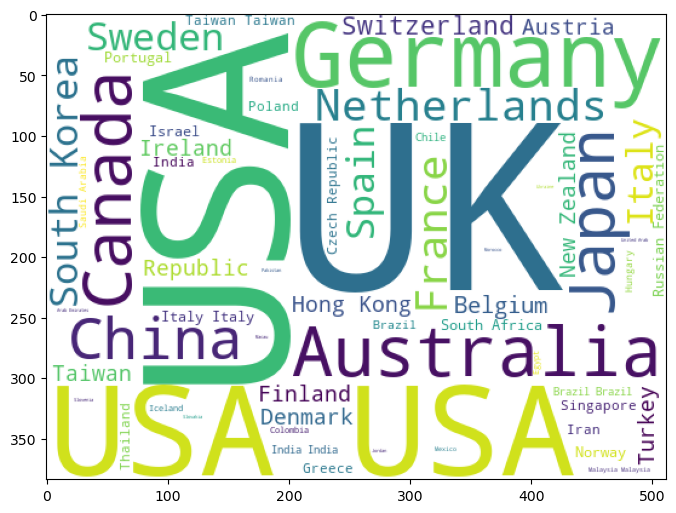

In [49]:
countries = times_data.country
countries.replace(['United States of America'], 'USA', inplace=True)
countries.replace(['United Kingdom'], 'UK', inplace=True)

# viz
plt.figure(figsize=(8, 8))

word_cloud = WordCloud(
    background_color='white',
    width=512,
    height=384
).generate(' '.join(countries))

plt.imshow(word_cloud)
plt.axis=('off')
# plt.savefig('county_name_cloud.png')

plt.show()

### Box plot

In [50]:
df2015 = times_data[times_data.year == 2015]

# viz
fig = {
    'data': [{
        'type': 'box',
        'y': df2015.total_score,
        'opacity': .75,
        'name': 'Total score of universities in 2015',
        'marker': {
            'color': 'rgba(12, 12, 140)'
        }
    }, {
        'type': 'box',
        'y': df2015.research,
        'opacity': .75,
        'name': 'Research of universities in 2015',
        'marker': {
            'color': 'rgba(12, 128, 128)'
        }
    }],
    'layout': {
        'boxmode': 'overlay',
        'title': 'Total score and Research of Universities in 2015'
    }
}

iplot(fig)

### scatter matrix plot

In [51]:
import plotly.figure_factory as ff

df2015 = df2015.loc[:, ['research', 'international', 'total_score']]
df2015['index'] = np.arange(1, len(df2015) + 1)

# viz
fig = ff.create_scatterplotmatrix(
    df2015,
    diag='box',
    index='index',
    colormap='Portland',
    colormap_type='cat',
    height=700,
    width=700
)

iplot(fig)

### inset plot

In [5]:
df = times_data[times_data.year == 2015]

fig = {
    'data': [{
        'type': 'scatter',
        'x': df.world_rank,
        'y': df.teaching,
        'name': 'teaching',
        'marker': {
            'color': 'rgba(16, 112, 2, 0.8)'
        },
        'mode': 'lines+markers'
    }, {
        'type': 'scatter',
        'x': df.world_rank,
        'y': df.income,
        'name': 'income',
        'marker': {
            'color': 'rgba(160, 112, 20, 0.8)'
        },
        'mode': 'lines'
    }],
    'layout': {
        'xaxis2': {
            'domain': [.6, .5],
            'anchor': 'y2'
        },
        'yaxis2': {
            'domain': [.6, .95],
            'anchor': 'x2'
        },
        'title': 'Income and Teaching vs World Rank of Universities',
        'xaxis': {
            'title': 'World rank'
        }
    }
}

iplot(fig)

NameError: name 'times_data' is not defined

### 3d scatter plot with color scaling

In [53]:
fig = {
    'data': [{
        'type': 'scatter3d',
        'x': [1, 2],
        'y': [1, 2],
        'z': [1, 2],
        'name': 'Legendary',
        'mode': 'lines+markers'
    }],
    'layout': {
        'showlegend': False,
        'scene': {
            'xaxis': {
                'title': 'x axis'
            },
            'yaxis': {
                'title': 'y axis'
            },
            'zaxis': {
                'title': 'z axis'
            }
        }
    }
}

iplot(fig)

In [54]:
# prep
hover_info = []

for name, rank, research, citation in zip(df.university_name, df.world_rank, df.research, df.citations):
    hover_info.append(f"Name: {name}<br>Rank: {rank}<br>Research: {research}<br>Citations: {citation}")

# viz
fig = {
    'data': [{
        'type': 'scatter3d',
        'x': df.world_rank,
        'y': df.research,
        'z': df.citations,
        'text': hover_info,
        'hoverinfo': 'text', # 'skip', 'text', default: 'x+y+z'
        'mode': 'lines+markers',
        'marker': {
            'size': 10,
            'color': 'green'
        }
    }],
    'layout': {
        'title': '3D Plot World rank, Reearch and Citations of universities in 2015',
        'margin': {
            'l': 0,
            'r': 0,
            'b': 0,
            't': 0,
        },
        'scene': {
            'xaxis': {
                'title': 'World Rank'
            },
            'yaxis': {
                'title': 'Research'
            },
            'zaxis': {
                'title': 'Citations'
            }
        }
    }
}
iplot(fig)

### Multiple Subplots

In [9]:
df = times_data[times_data.year == 2015]

trace1 = {
    'type': 'scatter',
    'x': df.world_rank,
    'y': df.research,
    'name': 'research'
}
trace2 = {
    'type': 'scatter',
    'x': df.world_rank,
    'y': df.citations,
    'xaxis': 'x2',
    'yaxis': 'y2',
    'name': 'citations'
}
trace3 = {
    'type': 'scatter',
    'x': df.world_rank,
    'y': df.income,
    'xaxis': 'x2',
    'yaxis': 'y2',
    'name': 'income'
}
trace4 = {
    'type': 'scatter',
    'x': df.world_rank,
    'y': df.total_score,
    'xaxis': 'x2',
    'yaxis': 'y2',
    'name': 'total_score'
}

data = [trace1, trace2, trace3, trace4]
layout = {
    'xaxis': {
        'domain': [0, .45]
    },
    'yaxis': {
        'domain': [0, .45]
    },
    
    'xaxis2': {
        'domain': [0.55, 1],
        'anchor': 'y2'
    },
    'yaxis2': {
        'domain': [0, .45],
        'anchor': 'x2'
    },
    
    'xaxis3': {
        'domain': [0, .45],
        'anchor': 'y3'
    },
    'yaxis3': {
        'domain': [.55, 1],
        'anchor': 'x3'
    },
    
    'xaxis4': {
        'domain': [0.55, 1],
        'anchor': 'y4'
    },
    'yaxis4': {
        'domain': [.55, 1],
        'anchor': 'x4'
    },
    
    'title': 'Research, Citation, Income and Total Score vs World Rank of Universities'
}

fig = go.Figure(data = data, layout = layout)
iplot(fig)